# Testing Code Companion for Intuitive Deep Learning Part 1

In [ ]:
'''This is doing the exercise to test the program written by Joseph Lee as a part of the CIS2532 assignment
Name: Tierra Gipson
Original Author:Joseph Lee
Original Author Github repository: https://github.com/josephlee94/intuitive-deep-learning '''

In [36]:
import pandas as pd

In [37]:
df = pd.read_csv('housepricedata.csv')

In [38]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [39]:
dataset = df.values

In [40]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [41]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [42]:
from sklearn import preprocessing

In [43]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [44]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [47]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [48]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [49]:
from keras.models import Sequential
from keras.layers import Dense

In [50]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [51]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [52]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 25ms/step - loss: 0.6991 - accuracy: 0.5117 - val_loss: 0.6906 - val_accuracy: 0.6073
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6859 - accuracy: 0.6252 - val_loss: 0.6835 - val_accuracy: 0.6301
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6779 - accuracy: 0.6419 - val_loss: 0.6780 - val_accuracy: 0.6119
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6716 - accuracy: 0.6243 - val_loss: 0.6730 - val_accuracy: 0.5616
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6657 - accuracy: 0.5949 - val_loss: 0.6678 - val_accuracy: 0.5616
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6600 - accuracy: 0.5841 - val_loss: 0.6623 - val_accuracy: 0.6073
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6547 - accuracy: 0.6712 - val_loss: 0.6570 - val_accuracy: 0.6484
Epoch 8/100


Epoch 59/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3379 - accuracy: 0.8757 - val_loss: 0.3109 - val_accuracy: 0.8904
Epoch 60/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3356 - accuracy: 0.8718 - val_loss: 0.3131 - val_accuracy: 0.8813
Epoch 61/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3330 - accuracy: 0.8757 - val_loss: 0.3083 - val_accuracy: 0.8950
Epoch 62/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3294 - accuracy: 0.8748 - val_loss: 0.3115 - val_accuracy: 0.8721
Epoch 63/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3288 - accuracy: 0.8718 - val_loss: 0.3021 - val_accuracy: 0.8950
Epoch 64/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3257 - accuracy: 0.8757 - val_loss: 0.3020 - val_accuracy: 0.8858
Epoch 65/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3241 - accuracy: 0.8728 - val_loss: 0.2990 - val_accuracy: 0.8904
Epoch 

In [53]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 3ms/step - loss: 0.2859 - accuracy: 0.8813


0.8812785148620605

In [54]:
import matplotlib.pyplot as plt

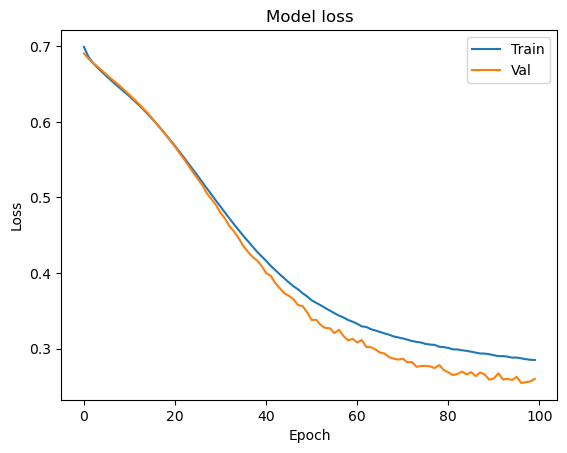

In [55]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

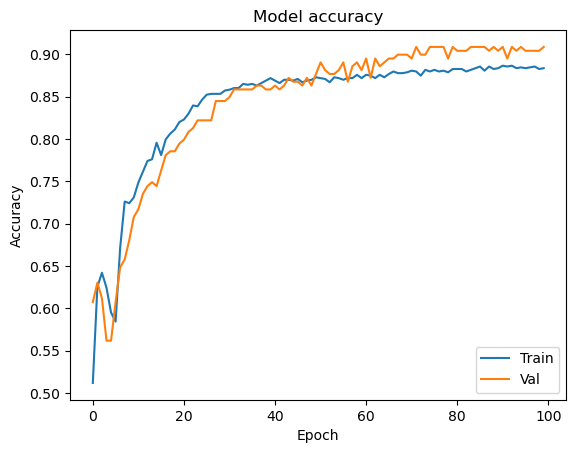

In [56]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [57]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 50ms/step - loss: 0.4556 - accuracy: 0.8004 - val_loss: 0.3740 - val_accuracy: 0.8539
Epoch 2/100
32/32 [==============================] - 1s 35ms/step - loss: 0.3374 - accuracy: 0.8532 - val_loss: 0.2930 - val_accuracy: 0.9041
Epoch 3/100
32/32 [==============================] - 1s 36ms/step - loss: 0.2973 - accuracy: 0.8806 - val_loss: 0.2552 - val_accuracy: 0.8950
Epoch 4/100
32/32 [==============================] - 1s 38ms/step - loss: 0.3079 - accuracy: 0.8796 - val_loss: 0.2540 - val_accuracy: 0.8995
Epoch 5/100
32/32 [==============================] - 1s 36ms/step - loss: 0.2777 - accuracy: 0.8885 - val_loss: 0.3312 - val_accuracy: 0.8539
Epoch 6/100
32/32 [==============================] - 1s 38ms/step - loss: 0.2642 - accuracy: 0.8924 - val_loss: 0.2649 - val_accuracy: 0.8858
Epoch 7/100
32/32 [==============================] - 1s 37ms/step - loss: 0.2992 - accuracy: 0.8659 - val_loss: 0.2822 - val_accuracy: 0.8904
Epoch 

32/32 [==============================] - 1s 35ms/step - loss: 0.1474 - accuracy: 0.9344 - val_loss: 0.2677 - val_accuracy: 0.8995
Epoch 59/100
32/32 [==============================] - 1s 37ms/step - loss: 0.1269 - accuracy: 0.9491 - val_loss: 0.3066 - val_accuracy: 0.8767
Epoch 60/100
32/32 [==============================] - 1s 35ms/step - loss: 0.1180 - accuracy: 0.9521 - val_loss: 0.3166 - val_accuracy: 0.8813
Epoch 61/100
32/32 [==============================] - 1s 36ms/step - loss: 0.1069 - accuracy: 0.9540 - val_loss: 0.3490 - val_accuracy: 0.8630
Epoch 62/100
32/32 [==============================] - 1s 37ms/step - loss: 0.1117 - accuracy: 0.9481 - val_loss: 0.3284 - val_accuracy: 0.8904
Epoch 63/100
32/32 [==============================] - 1s 36ms/step - loss: 0.1217 - accuracy: 0.9472 - val_loss: 0.3357 - val_accuracy: 0.8539
Epoch 64/100
32/32 [==============================] - 1s 36ms/step - loss: 0.1238 - accuracy: 0.9452 - val_loss: 0.3897 - val_accuracy: 0.8995
Epoch 65/100

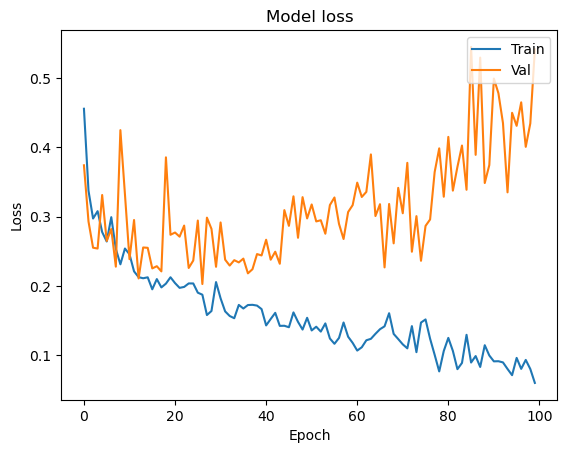

In [60]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

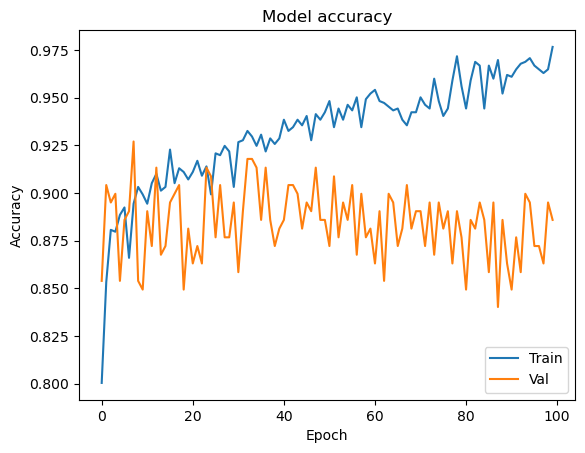

In [62]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [63]:
from keras.layers import Dropout
from keras import regularizers

In [64]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [65]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 4s 57ms/step - loss: 14.2425 - accuracy: 0.6781 - val_loss: 3.8748 - val_accuracy: 0.8356
Epoch 2/100
32/32 [==============================] - 1s 44ms/step - loss: 1.7157 - accuracy: 0.8043 - val_loss: 0.6524 - val_accuracy: 0.8858
Epoch 3/100
32/32 [==============================] - 1s 44ms/step - loss: 0.6094 - accuracy: 0.8444 - val_loss: 0.4901 - val_accuracy: 0.9178
Epoch 4/100
32/32 [==============================] - 1s 44ms/step - loss: 0.5060 - accuracy: 0.8787 - val_loss: 0.4549 - val_accuracy: 0.8904
Epoch 5/100
32/32 [==============================] - 1s 43ms/step - loss: 0.5280 - accuracy: 0.8640 - val_loss: 0.7079 - val_accuracy: 0.7443
Epoch 6/100
32/32 [==============================] - 1s 44ms/step - loss: 0.5246 - accuracy: 0.8523 - val_loss: 0.4566 - val_accuracy: 0.8950
Epoch 7/100
32/32 [==============================] - 1s 43ms/step - loss: 0.5089 - accuracy: 0.8659 - val_loss: 0.4429 - val_accuracy: 0.8904
Epoch

32/32 [==============================] - 1s 43ms/step - loss: 0.4370 - accuracy: 0.8855 - val_loss: 0.4535 - val_accuracy: 0.8584
Epoch 59/100
32/32 [==============================] - 1s 43ms/step - loss: 0.4496 - accuracy: 0.8757 - val_loss: 0.3950 - val_accuracy: 0.8995
Epoch 60/100
32/32 [==============================] - 1s 44ms/step - loss: 0.4508 - accuracy: 0.8816 - val_loss: 0.3931 - val_accuracy: 0.9041
Epoch 61/100
32/32 [==============================] - 1s 42ms/step - loss: 0.4415 - accuracy: 0.8806 - val_loss: 0.3875 - val_accuracy: 0.9087
Epoch 62/100
32/32 [==============================] - 1s 43ms/step - loss: 0.4380 - accuracy: 0.8885 - val_loss: 0.3881 - val_accuracy: 0.9087
Epoch 63/100
32/32 [==============================] - 1s 42ms/step - loss: 0.4577 - accuracy: 0.8787 - val_loss: 0.3933 - val_accuracy: 0.8995
Epoch 64/100
32/32 [==============================] - 1s 44ms/step - loss: 0.4561 - accuracy: 0.8689 - val_loss: 0.4129 - val_accuracy: 0.8858
Epoch 65/100

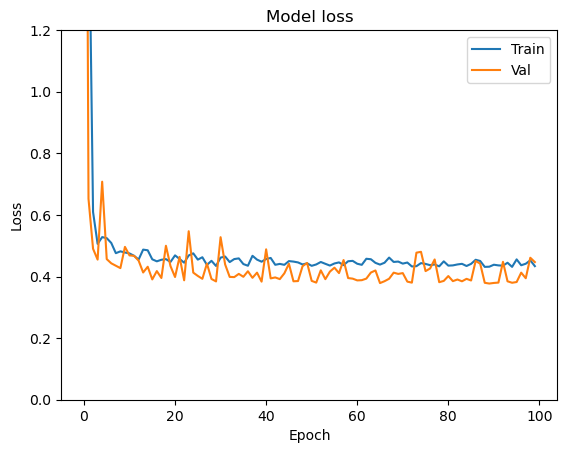

In [66]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

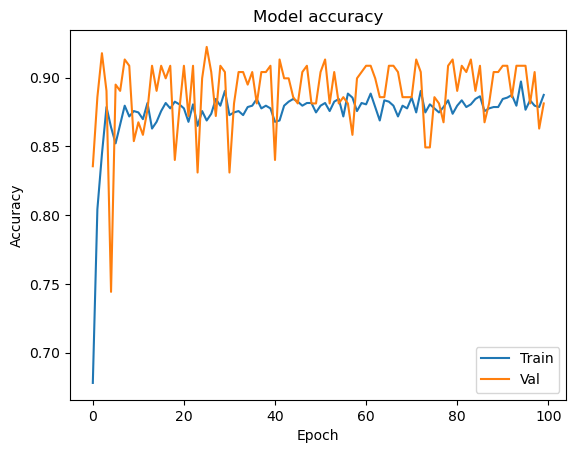

In [68]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()